In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
from random import random
import pandas as pd
import numpy as np
from scipy.stats import sem


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv(mouse_drug_data_to_load)
clinical_trial = pd.read_csv(clinical_trial_data_to_load)
#print(mouse_drug.head())
#print(clinical_trial.head())

# Combine the data into a single dataset
combined_data = pd.merge(clinical_trial, mouse_drug,
                                 how='left', on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
combined_data_group = combined_data.groupby(["Drug","Timepoint"])
tumor_volume_mean = combined_data_group["Tumor Volume (mm3)"].mean()
#tumor_volume_mean = combined_data.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]


tumor_volume_mean_df = pd.DataFrame(data = tumor_volume_mean)

tumor_volume_mean_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Minor Data Munging to Re-Format the Data Frames
#tumor_volume_mean_df = pd.pivot_table(tumor_volume_mean, 
#                                values = ["Tumor Volume (mm3)"], 
#                                index=["Timepoint"],
#                                columns =["Drug"],
#                                aggfunc=np.sum, 
#                                fill_value=0)
# Preview that Reformatting worked
tumor_volume_mean = tumor_volume_mean.reset_index()
tumor_volume_mean_df = tumor_volume_mean.pivot(index="Timepoint",columns="Drug")["Tumor Volume (mm3)"]
tumor_volume_mean_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
tumor_volume_mean = combined_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem().reset_index()
tumor_volume_mean_se = pd.DataFrame(data = tumor_volume_mean)
tumor_volume_mean_se.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
tumor_volume_mean_se = pd.pivot_table(tumor_volume_mean, 
                                values = ["Tumor Volume (mm3)"], 
                                index=["Timepoint"],
                                columns =["Drug"],
                                aggfunc=np.sum, 
                                fill_value=0)
# Preview that Reformatting worked
tumor_volume_mean_se.head()

Tumor Volume (mm3)                                          \
Drug               Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                              
0                   0.000000  0.000000  0.000000  0.000000  0.000000   
5                   0.448593  0.164505  0.235102  0.264819  0.202385   
10                  0.702684  0.236144  0.282346  0.357421  0.319415   
15                  0.838617  0.332053  0.357705  0.580268  0.444378   
20                  0.909731  0.359482  0.476210  0.726484  0.595260   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.218091  0.231708  0.482955  0.239862  0.188950  
10         0.402064  0.376195  0.720225  0.433678  0.263949  
15         0.614461  0.466109  0.770432  0.493261  0.370544  
20         0.839609  0.555181  0.786199  0.621889  0.533182

In [6]:
#x-axis
time = tumor_volume_mean_se.index.tolist()

#y-axis
capomulin = tumor_volume_mean_df.iloc[:,0].tolist()
infubinol = tumor_volume_mean_df.iloc[:,2].tolist()
ketapril = tumor_volume_mean_df.iloc[:,3].tolist()
placebo = tumor_volume_mean_df.iloc[:,5].tolist()

cap_error = tumor_volume_mean_se.iloc[:,0].tolist()
inf_error = tumor_volume_mean_se.iloc[:,2].tolist()
ket_error = tumor_volume_mean_se.iloc[:,3].tolist()
pla_error = tumor_volume_mean_se.iloc[:,5].tolist()

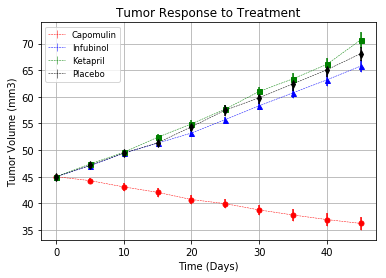

In [7]:
# Show the Figure
plt.errorbar(time,capomulin, yerr=cap_error, color='r', linestyle='dashed', linewidth=0.50, label='Capomulin')
plt.errorbar(time,capomulin, yerr=cap_error, color='r', fmt="o", markersize=5)

plt.errorbar(time, infubinol, yerr=inf_error, color='b', linestyle='dashed', linewidth=0.50, label='Infubinol')
plt.errorbar(time, infubinol, yerr=inf_error, color='b', fmt="^", markersize=5)

plt.errorbar(time, ketapril, yerr=ket_error, color='g', linestyle='dashed', linewidth=0.50, label='Ketapril')
plt.errorbar(time, ketapril, yerr=ket_error, color='g',fmt="s", markersize=5)

plt.errorbar(time, placebo, yerr=pla_error, color='k', linestyle='dashed', linewidth=0.50, label='Placebo')
plt.errorbar(time, placebo, yerr=pla_error, color='k', fmt='d', markersize=5)

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

plt.savefig("tumorAnalysis.png")

plt.show()


![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
meta_mean = combined_data.groupby(["Drug","Timepoint"]).mean()["Metastatic Sites"]

meta_mean = meta_mean.reset_index()
meta_mean_df = pd.DataFrame(data = meta_mean)

meta_mean_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
meta_mean_df = pd.pivot_table(meta_mean, 
                                values = ["Metastatic Sites"], 
                                index=["Timepoint"],
                                columns =["Drug"],
                                aggfunc=np.sum, 
                                fill_value=0)
# Preview that Reformatting worked
meta_mean_df.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
meta_mean_se = combined_data.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem().reset_index()
meta_mean_se_df = pd.DataFrame(data = meta_mean_se)
meta_mean_se_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [11]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
# Minor Data Munging to Re-Format the Data Frames
meta_mean_se_df = pd.pivot_table(meta_mean_se, 
                                values = ["Metastatic Sites"], 
                                index=["Timepoint"],
                                columns =["Drug"],
                                aggfunc=np.sum, 
                                fill_value=0)
# Preview that Reformatting worked
meta_mean_se_df.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10                0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15                0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20                0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378

In [12]:
#x-axis
time = meta_mean_se_df.index.tolist()

#y-axis
capomulin = meta_mean_df.iloc[:,0].tolist()
infubinol = meta_mean_df.iloc[:,2].tolist()
ketapril = meta_mean_df.iloc[:,3].tolist()
placebo = meta_mean_df.iloc[:,5].tolist()

cap_error = meta_mean_se_df.iloc[:,0].tolist()
inf_error = meta_mean_se_df.iloc[:,2].tolist()
ket_error = meta_mean_se_df.iloc[:,3].tolist()
pla_error = meta_mean_se_df.iloc[:,5].tolist()

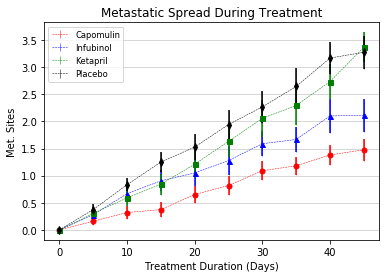

In [13]:
# Generate the Plot (with Error Bars)
# Save the Figure
# Show the Figure

# Show the Figure
plt.errorbar(time,capomulin, yerr=cap_error, color='r', linestyle='dashed', linewidth=0.50, label='Capomulin')
plt.errorbar(time,capomulin, yerr=cap_error, color='r', fmt="o", markersize=5)

plt.errorbar(time, infubinol, yerr=inf_error, color='b', linestyle='dashed', linewidth=0.50, label='Infubinol')
plt.errorbar(time, infubinol, yerr=inf_error, color='b', fmt="^", markersize=5)

plt.errorbar(time, ketapril, yerr=ket_error, color='g', linestyle='dashed', linewidth=0.50, label='Ketapril')
plt.errorbar(time, ketapril, yerr=ket_error, color='g',fmt="s", markersize=5)

plt.errorbar(time, placebo, yerr=pla_error, color='k', linestyle='dashed', linewidth=0.50, label='Placebo')
plt.errorbar(time, placebo, yerr=pla_error, color='k', fmt='d', markersize=5)

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.grid(linewidth=0.50, axis='y')
plt.legend(loc="best", fontsize="small", fancybox=True)

plt.savefig("metastaticAnalysis.png")

plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame
survival_count = combined_data.groupby(["Drug","Timepoint"]).count()["Tumor Volume (mm3)"]
survival_count

survival_count = pd.DataFrame({"Mouse Count": survival_count})

survival_count.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [15]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame
survival_count = survival_count.reset_index()
survival_count_pivot = survival_count.pivot(index="Timepoint",columns="Drug")["Mouse Count"]
# Preview that Reformatting worked
survival_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


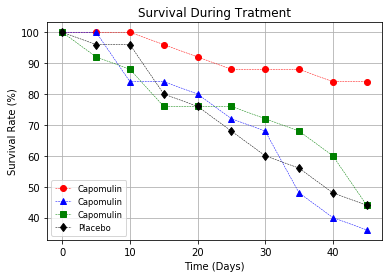

In [16]:
# Generate the Plot (Accounting for percentages)
# Save the Figure
# Show the Figure
numMice = 25

plt.plot(survival_count_pivot["Capomulin"]/numMice *100, "ro", linestyle="dashed", linewidth=0.50, label="Capomulin")
plt.plot(survival_count_pivot["Infubinol"]/numMice *100, "b^", linestyle="dashed", linewidth=0.50, label="Capomulin")
plt.plot(survival_count_pivot["Ketapril"]/numMice *100, "gs", linestyle="dashed", linewidth=0.50, label="Capomulin")
plt.plot(survival_count_pivot["Placebo"]/numMice *100, "kd", linestyle="dashed", linewidth=0.50, label="Placebo")
plt.title("Survival During Tratment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

plt.savefig("survivalAnalysis.png")

plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug
# Display the data to confirm
tumor_pct_change = 100 * (tumor_volume_mean_df.iloc[-1] - tumor_volume_mean_df.iloc[0])/ tumor_volume_mean_df.iloc[0]
#tumor_pct_change_se = 100 * (tumor_volume_mean_se.iloc[-1] - tumor_volume_mean_se.iloc[0])/ tumor_volume_mean_se.iloc[0]

tumor_pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [18]:
# Store all Relevant Percent Changes into a Tuple
pct_changes = (tumor_pct_change["Capomulin"],
               tumor_pct_change["Infubinol"],
               tumor_pct_change["Ketapril"],
               tumor_pct_change["Placebo"])
pct_changes

(-19.475302667894173,
 46.123471727851836,
 57.028794686606076,
 51.29796048315153)

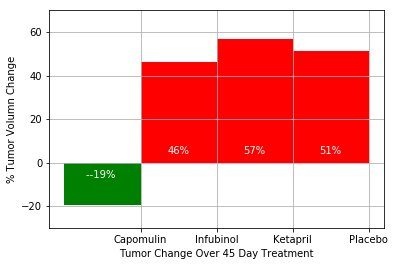

In [34]:
# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
# Call functions to implement the function calls

fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))
width = 1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color= 'green')
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color= 'red')

ax.set_ylabel('% Tumor Volumn Change')
ax.set_xlabel('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin','Infubinol','Ketapril','Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3, 
               '%d%%' % int(height),
               ha='center', va='bottom', color="white")
        
def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8, 
               '-%d%% ' % int(height),
               ha='center', va='bottom', color="white")        

autolabelPass(rectsPass)         
autolabelFail(rectsFail)        


#Save the Figure
#Show the Figure
plt.savefig("tumorChnageAnalysis.png")

![Metastatic Spread During Treatment](../Images/change.png)